# IMAGE BASED STEGANOGRAPHY
## CSE3045 Review 3
## Team 1

In [1]:
from PIL import Image
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display,clear_output
import smtplib
from email.message import EmailMessage

import warnings
warnings.filterwarnings('ignore')

In [2]:
def convert(data):
        binary=[]
        for i in data:
            binary.append(format(ord(i),'08b'))
        return binary

In [3]:
def modifypix(pix,data):
    dl=convert(data)
    size=len(dl)
    imdata=iter(pix)
 
    for i in range(size):
        pix=[value for value in imdata.__next__()[:3]+imdata.__next__()[:3]+imdata.__next__()[:3]]
 
        for j in range(0,8):
            if(dl[i][j]=='0' and pix[j]%2!=0):
                pix[j]=pix[j]-1
 
            elif(dl[i][j]=='1' and pix[j]%2==0):
                if(pix[j]==0):
                    pix[j]=pix[j]+1
                else:
                    pix[j]=pix[j]-1
    
        if(i==size-1):
            if(pix[-1]%2==0):
                if(pix[-1]!=0):
                    pix[-1]=pix[-1]-1
                else:
                    pix[-1]=pix[-1]+1
 
        else:
            if(pix[-1]%2!=0):
                pix[-1]=pix[-1]-1
     
        pix=tuple(pix)
        yield pix[0:3]
        yield pix[3:6]
        yield pix[6:9]

In [4]:
def exchange(img,data):
    w=img.size[0]
    x=0
    y=0
    pix=img.getdata()
    for i in modifypix(pix,data):
        
        img.putpixel((x,y),i) 
        if (x==w-1):
            x=0
            y=y+1
        else:
            x=x+1

In [5]:
def encoding():
    img=input("Enter image name with extension:")
    img=Image.open(img,'r')
    print("The image to be encoded:")
    display(img)
    b,h=img.size
    y=b*h
    
    data=input("Type your secret journal entry: ")
    x=len(data)
    if(x==0):
        print("Data is empty")
        exit()
    if(y>(x*3)):
        print("The image has ",y," number of pixels, You're good to go")
    else:
        print("Number of pixels is not enough, upload a larger image.")
        exit()
        
    newimg=img.copy()
    exchange(newimg, data)

    name=input("Enter the name of new image with extension:")
    newimg.save(name, str(name.split(".")[1].upper()))
    print("Encoding has finished successfully, you can now download your new image!")

In [6]:
def decoding():
    img=input("Enter image name(with extension) : ")
    image=Image.open(img, 'r')
    print("The image to be decoded:")
    display(image)
    data=''
    
    imgdata=iter(image.getdata())
    while(True):
        pixels=[value for value in imgdata.__next__()[:3]+imgdata.__next__()[:3]+imgdata.__next__()[:3]]
 
        binstr=''
        for i in pixels[:8]:
            if (i%2==0):
                binstr+='0'
            else:
                binstr+='1'
         
        data+=chr(int(binstr,2))
        if (pixels[-1] % 2 != 0):
            return data

In [7]:
def main():
    page()
    while(1):
        a=int(input("\nEnter your option here: "))
        if (a==1):
            encoding()
        elif (a==2):
            print("The decoded message:" + decoding())
        elif (a==3):
            print("Send your friend an encoded secret message")
            mail()
        elif (a==4):
            print("Thank you for using the journal!")
            break
        else:
            print("Invalid input")
            break

In [8]:
def mail():
    frnd=input("Enter your friend's gmail id here:")
    mailid="exampleacct31@gmail.com"
    password="password#87"
    img=input("Enter image name with extension: ")

    server=smtplib.SMTP_SSL("smtp.gmail.com",465)
    server.login(mailid,password)

    msg=EmailMessage()
    msg['Subject']='Open your secret gift'
    msg['From']=mailid
    msg['To']=frnd
    msg.set_content('Your secret message attached, to decrypt visit our page')

    with open(img,'rb') as f:
        data=f.read()
        imgtype='png'
    
    msg.add_attachment(data,maintype='image',subtype=imgtype,filename=f.name) 
    server.send_message(msg)
    server.quit

In [9]:
def page():
    text_0=widgets.HTML(value="<h1>PRIVATE JOURNAL</h1>")
    vbox_text=widgets.VBox([text_0])
    text_2=widgets.HTML(value="<h2>Choose your option:</h2>")
    text_3=widgets.HTML(value="<h3>1. Encode</h3>")
    text_4=widgets.HTML(value="<h3>2. Decode</h3>")
    text_5=widgets.HTML(value="<h3>3. Mail Yhgjour Friend</h3>")
    text_6=widgets.HTML(value="<h3>4. Exit</h3>")
    page = widgets.VBox([vbox_text,text_2,text_3,text_4,text_5,text_6])
    display(page)


Enter your option here: 1
Enter image name with extension:img.png
The image to be encoded:


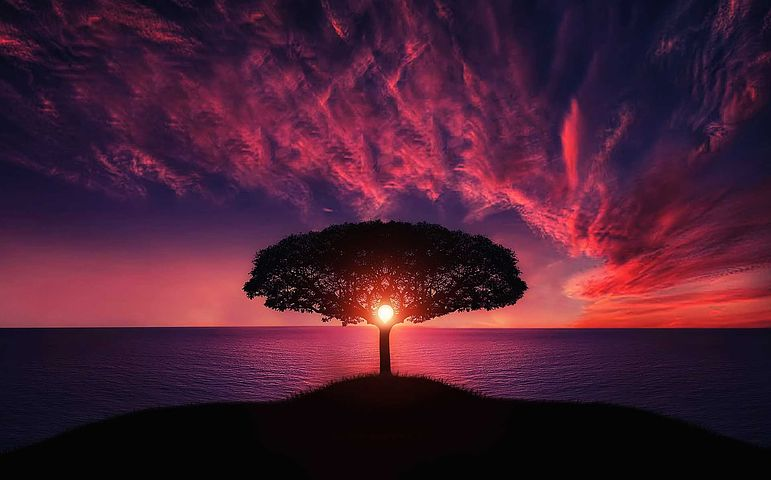

Type your secret journal entry: Hey there
The image has  370080  number of pixels, You're good to go
Enter the name of new image with extension:img1.png
Encoding has finished successfully, you can now download your new image!

Enter your option here: 2
Enter image name(with extension) : img1.png
The image to be decoded:


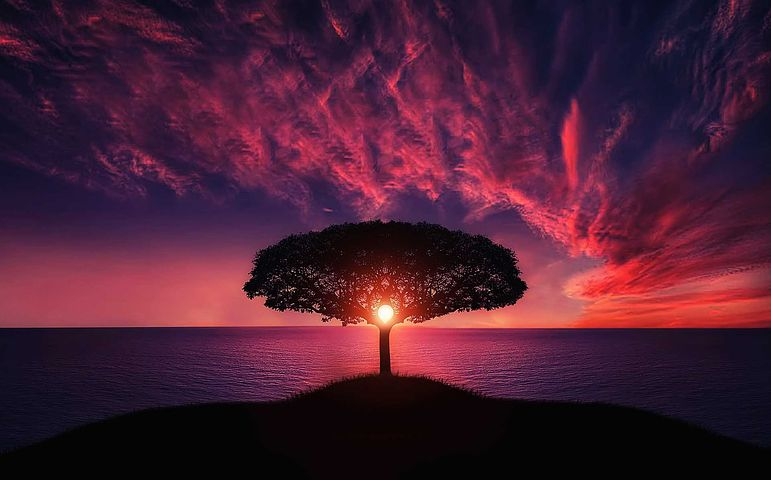

The decoded message:Hey there

Enter your option here: 3
Send your friend an encoded secret message
Enter your friend's gmail id here:exampleacct31@gmail.com
Enter image name with extension: img1.png

Enter your option here: 4
Thank you for using the journal!


In [10]:
main()